# **Lab 4 : Nonlinear Regression**<br>

Regression is the process of estimating a model that produces the best fit for the given data. The simplest method of doing this is by Linear Regression, which assumes that the data are linear in the unknown parameters. But in real life, there are many scenarios where the data is not linearly related. Any model that is not linear in the unknown parameters is known as a **Nonlinear Regression** model. There are various forms of nonlinear regression models, one of which is the **Exponential model**, which is given as $y = ae^{bx_i}$, where $a$ and $b$ are the parameters of the regression model. The values of these two parameters should be such that the produced result of $ae^{bx_i}$ should have the least deviation from the actual result. In order to measure how well our model fits the data or how much it deviates from the actual result, we use the least square criterion $S_r = \sum_{i=1}^{n}E_i^2$.

In today's lab, we will be implementing the Exponential Regression model in python. To test our implementation, we will be using the same data that is available in the first example of our class lecture pdf. That way, you can check whether your implementation is working correctly by comparing with the results obtained in that example. Run the following cell to load the known data points:
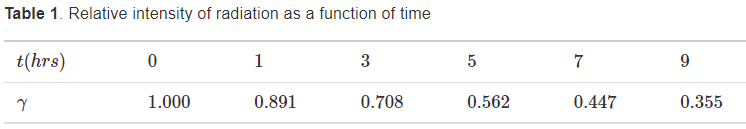


In [ ]:
time = [0, 1, 3, 5, 7, 9]
gamma = [1, 0.891, 0.708, 0.562, 0.447, 0.355]

##Task 1
Assuming that the exponential model for the given data is defined as $\gamma = Ae^{\lambda t}$, write a function that takes the given data as input and returns the regression parameters $A$ and $\lambda$.

**Note:** For calculating $\lambda$, use the Bisection method with intial guesses $\lambda_l = -0.120$ and $\lambda_u = -0.110$. Conduct at least $20$ iterations.

The formulae for the parameters are,<br>
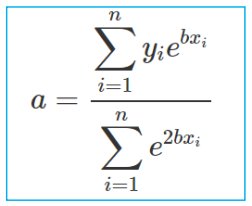
<br>
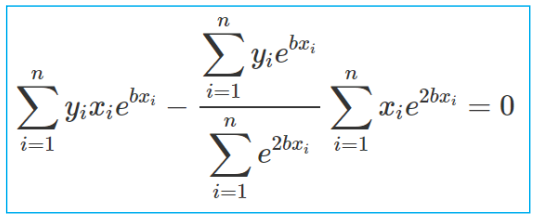

In [ ]:
from math import e

def Calculate_a(given_lambda):
    # Calculating the numerator and denominator for A
    numerator = sum(g * e ** (given_lambda * t) for t, g in zip(time, gamma))
    denominator = sum(e ** (2 * given_lambda * t) for t in time)
    return numerator / denominator


def root_func(given_lambda):
    A = Calculate_a(given_lambda)
    return sum(t * g * e ** (given_lambda * t) for t, g in zip(time, gamma)) - \
           A * sum(t * e ** (2 * given_lambda * t) for t in time)


def NonLinearRegression(time, gamma):
    # Write your implementation here
    lambda_low = -0.120
    lambda_hi = -0.110
    max_itr = 20
    tol = 1e-6


    for _ in range(max_itr):
        lambda_mid = (lambda_low + lambda_hi) / 2.0
        f_mid = root_func(lambda_mid)

        if abs(f_mid) < tol:
            break

        f_low = root_func(lambda_low)

        if f_mid * f_low < 0:
            lambda_hi = lambda_mid
        else:
            lambda_low = lambda_mid


    _lambda = (lambda_low + lambda_hi) / 2.0
    A = Calculate_a(_lambda)

    return A, _lambda

In [ ]:
A, _lambda = NonLinearRegression(time, gamma)
print("A:", A)
print("Lambda:", _lambda)

A: 0.9998413315691694
Lambda: -0.1150830078125


You should get $A \approx 0.99983$ and $\lambda \approx -0.11508$.<br>
As a consequence, the exponential model for this example becomes $\gamma = 0.99983e^{-0.11508t}$

##Task 2
Write another function that takes any arbitrary value as input and applies the regression model to generate the output.

In [ ]:
def predict(A,_lambda,t):
    # Write your implementation here

    res = A * e ** (_lambda * t)

    return res

##Task 3
Use the calculate function in a loop to generate a plot of the regression curve. Show the original data points $(t_i, \gamma_i)$ on the same plot using scatter function. Use different colors for the regression curve and the original data points and show a legend. For this task, you are allowed to use various libraries such as `matplotlib`.

**Tip:** `np.linspace()` might come in handy.

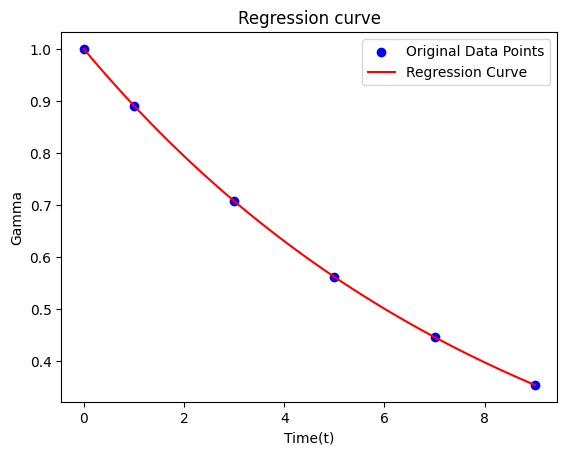

In [ ]:
#Write your code here for generating the plot
import numpy as np
import matplotlib.pyplot as plt
from math import e


t_values = np.linspace(min(time), max(time), 100)
gamma_values = []

for t in t_values:
    gamma_values.append(predict(A, _lambda, t))

plt.scatter(time, gamma, color='blue', label='Original Data Points')
plt.plot(t_values, gamma_values, color='red', label='Regression Curve')

plt.xlabel('Time(t)')
plt.ylabel('Gamma')
plt.title('Regression curve')
plt.legend()


plt.show()



Your graph should look something like this.
<br>
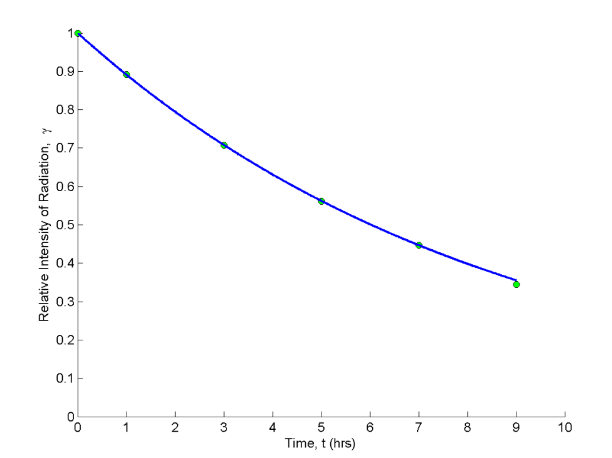